In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from rpy2.robjects.packages import importr

utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages('lme4')

%load_ext rpy2.ipython

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/lme4_1.1-27.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3311365 bytes (3.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [26]:
# Load data
utterances = pd.read_csv("results/intelligibility/utterances.csv")

# convert True/False to 0/1:
utterances.replace({False: 0, True: 1}, inplace=True)

utterances.head()


,response_latency,response_latency_follow_up,age,corpus,transcript_file,child_name,utt_child,utt_car,utt_child_follow_up,utt_child_intelligible,utt_car_intelligible,follow_up_intelligible,caregiver_response,caregiver_response_contingent
0,inf,1754,24,MPI-EVA-Manchester,/home/mitja/data/CHILDES/MPI-EVA-Manchester/El...,MPI-EVA-Manchester_Eleanor,xxx for the toilet,NaN,toilet,1,0,1,0,0
1,inf,3367,24,MPI-EVA-Manchester,/home/mitja/data/CHILDES/MPI-EVA-Manchester/El...,MPI-EVA-Manchester_Eleanor,[=! mumbles],NaN,Dada,0,0,1,0,1
2,inf,1126,24,MPI-EVA-Manchester,/home/mitja/data/CHILDES/MPI-EVA-Manchester/El...,MPI-EVA-Manchester_Eleanor,Dada,NaN,Dada &da xxx,1,0,1,0,0
3,inf,1137,24,MPI-EVA-Manchester,/home/mitja/data/CHILDES/MPI-EVA-Manchester/El...,MPI-EVA-Manchester_Eleanor,Dada &da xxx,NaN,Dada &da xxx,1,0,1,0,0
4,inf,5632,24,MPI-EVA-Manchester,/home/mitja/data/CHILDES/MPI-EVA-Manchester/El...,MPI-EVA-Manchester_Eleanor,in the pond,NaN,we're going to the town over there,1,0,1,0,0


In [13]:
# Some children have very few data points:
counts = utterances.groupby("child_name").size()
counts

child_name
Bernstein_Alice                    3
Bernstein_Anne                     1
Bernstein_Dale                     1
Bernstein_Gail                     3
Bernstein_Marie                    1
Braunwald_Laura                 8919
Brent_Alexander                  242
Brent_Allen                        3
Brent_Brooklyn                     8
Brent_Dillon                     814
Brent_Henry                      175
Brent_Jacob_Abernathy              4
Brent_Jaylen                      36
Brent_Maggie                     176
Brent_Miranda                    170
Brent_Morgan                     742
Brent_Tabitha                    335
Brent_Tabitha_Sims                 3
Brent_Timothy                    470
Brent_Tyrese                       6
Brent_Vas                         12
Brent_Vas_Coleman                109
Brent_Xavier                      12
MPI-EVA-Manchester_Eleanor     48878
MPI-EVA-Manchester_Fraser     104564
MacWhinney_Ross                12043
Peters_Seth                

In [14]:
# Exclude children with less than 100 datapoints:
# child_names_enough_data = [name for name, count in counts.items() if count > 100]
# print(len(utterances))
# utterances = utterances[utterances.child_name.isin(child_names_enough_data)]
# print(len(utterances))

## Caregiver Contingency
### By child

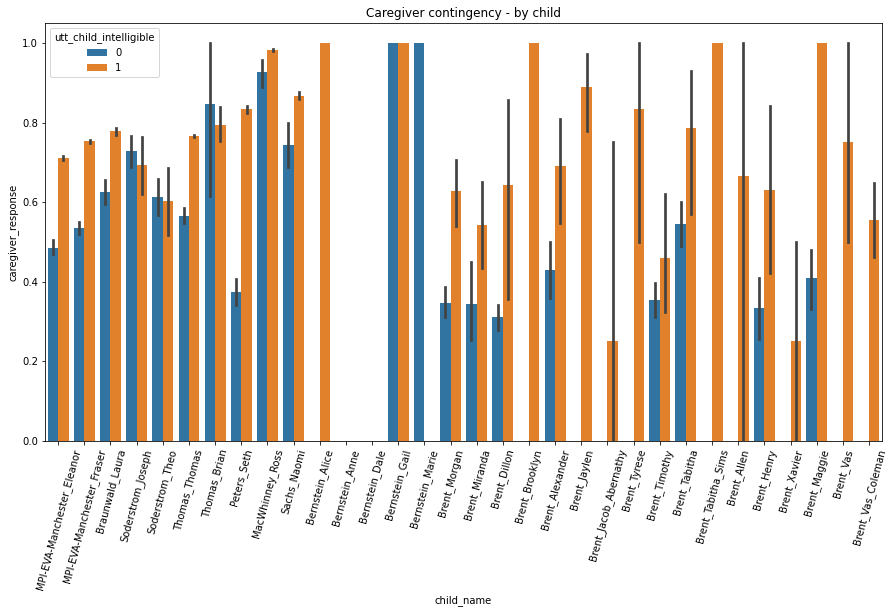

In [15]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(
        data=utterances,
        x="child_name",
        y="caregiver_response",
        hue="utt_child_intelligible"
)
plt.title("Caregiver contingency - by child")
plt.xticks(rotation=75)
plt.subplots_adjust(bottom=0.3)

### By Age

Text(0.5, 1.0, 'Caregiver contingency - by age')

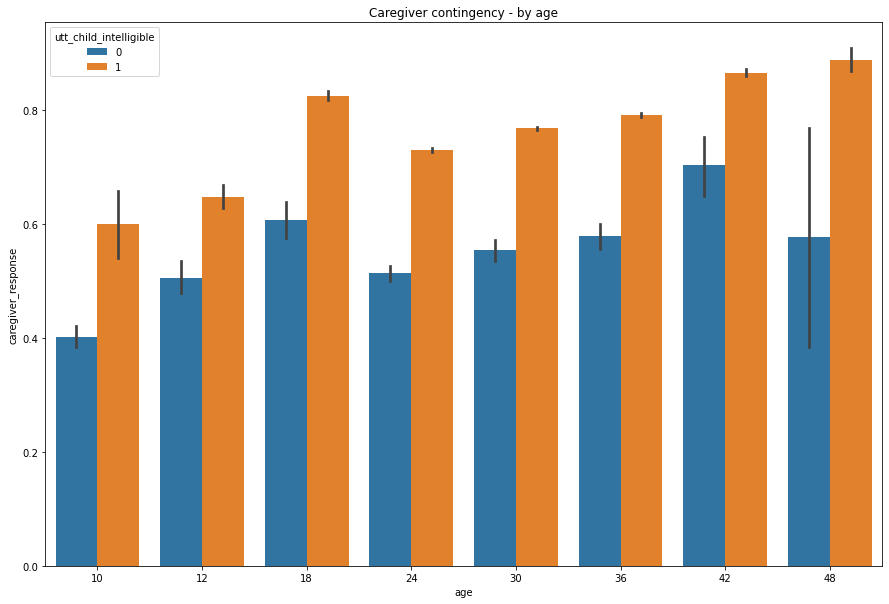

In [16]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(
        data=utterances,
        x="age",
        y="caregiver_response",
        hue="utt_child_intelligible"
)
plt.title("Caregiver contingency - by age")

## Child contingency
### By Child


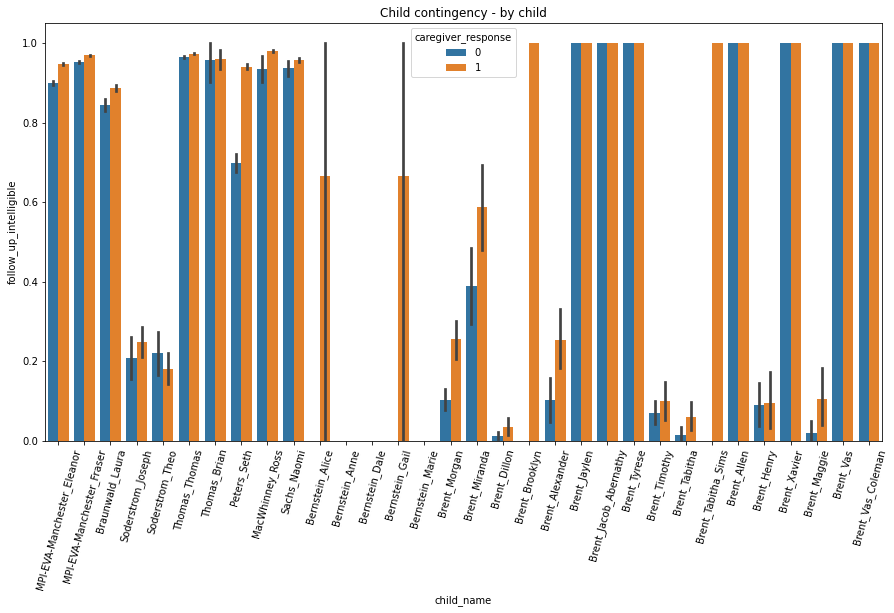

In [17]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(
        data=utterances,
        x="child_name",
        y="follow_up_intelligible",
        hue="caregiver_response"
)
plt.title("Child contingency - by child")
plt.xticks(rotation=75)
plt.subplots_adjust(bottom=0.3)

### By Age

Text(0.5, 1.0, 'Child contingency - by age')

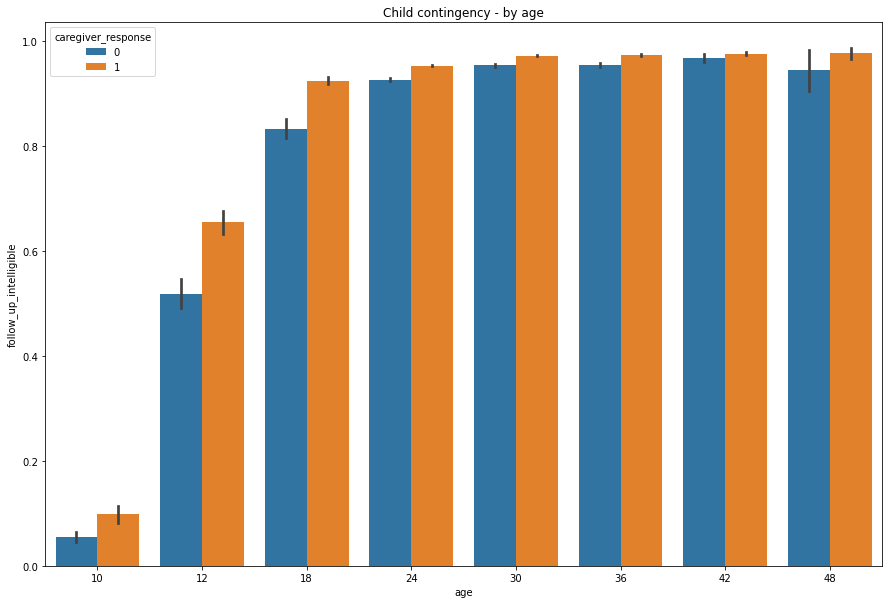

In [18]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(
        data=utterances,
        x="age",
        y="follow_up_intelligible",
        hue="caregiver_response"
)
plt.title("Child contingency - by age")

## Caregiver contingency
### GLM (with mixed effects)

In [41]:
# normalize age
min_age, max_age = utterances["age"].min(), utterances["age"].max()
utterances["age"] = (utterances["age"] - min_age) / (max_age - min_age) * (1 - 0)


In [ ]:
# Delete utterance column, it is not needed anymore and causes conversion problems for R
del utterances["utt_car"]


In [43]:
%%R -i utterances
library(lme4)

# Caregiver contingency
m_caregiver_contingency<-glmer('caregiver_response ~ utt_child_intelligible * age + (1 | child_name)', data=utterances, family=binomial) #, control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))
print(summary(m_caregiver_contingency))


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: caregiver_response ~ utt_child_intelligible * age + (1 | child_name)
   Data: utterances

      AIC       BIC    logLik  deviance  df.resid 
 320675.6  320728.6 -160332.8  320665.6    297134 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.2442  0.1179  0.5528  0.6028  1.4825 

Random effects:
 Groups     Name        Variance Std.Dev.
 child_name (Intercept) 0.621    0.7881  
Number of obs: 297139, groups:  child_name, 32

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.15594    0.08788  -1.774    0.076 .  
utt_child_intelligible      1.10872    0.02768  40.055  < 2e-16 ***
age                         1.43682    0.05117  28.080  < 2e-16 ***
utt_child_intelligible:age -0.34125    0.05174  -6.595 4.24e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Co

### GLM (without mixed effects)

In [ ]:
%%R -i utterances
library(lme4)

# Caregiver contingency
m_caregiver_contingency<-glm('caregiver_response ~ utt_child_intelligible * age', data=utterances, family=binomial) #, control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))
print(summary(m_caregiver_contingency))

## Child Contingency
### GLM (with mixed effects)

In [ ]:
%%R -i utterances
library(lme4)

utterances_child_intelligible = subset(utterances, utt_child_intelligible==1)

# Child contingency
m_child_contingency<-glmer('follow_up_intelligible ~ caregiver_response * age + (1 | child_name)', data=utterances_child_intelligible, family=binomial)
print(summary(m_child_contingency))